# A tutorial for the whitebox Python package

This notebook demonstrates the usage of the **whitebox** Python package for geospatial analysis, which is built on a stand-alone executable command-line program called [WhiteboxTools](https://github.com/jblindsay/whitebox-tools).

* Authors: Dr. John Lindsay (https://jblindsay.github.io/ghrg/index.html)
* Contributors: Dr. Qiusheng Wu (https://wetlands.io)
* GitHub repo: https://github.com/giswqs/whitebox-python
* WhiteboxTools: https://github.com/jblindsay/whitebox-tools
* User Manual: https://jblindsay.github.io/wbt_book
* PyPI: https://pypi.org/project/whitebox/
* Documentation: https://whitebox.readthedocs.io
* Binder: https://gishub.org/whitebox-cloud
* Free software: [MIT license](https://opensource.org/licenses/MIT)

This tutorial can be accessed in three ways:

* HTML version: https://gishub.org/whitebox-html
* Viewable Notebook: https://gishub.org/whitebox-notebook
* Interactive Notebook: https://gishub.org/whitebox-cloud

**Launch this tutorial as an interactive Jupyter Notebook on the cloud - [MyBinder.org](https://gishub.org/whitebox-cloud).**

![whitebox-gif](https://i.imgur.com/LF4UE1j.gif)

## Table of Content

* [Installation](#Installation)
* [About whitebox](#About-whitebox)
* [Getting data](#Getting-data)
* [Using whitebox](#Using-whitebox)
* [Displaying results](#Displaying-results)
* [whitebox GUI](#whitebox-GUI)
* [Citing whitebox](#Citing-whitebox)
* [Credits](#Credits)
* [Contact](#Contact)


## Installation


**whitebox** supports a variety of platforms, including Microsoft Windows, macOS, and Linux operating systems. Note that you will need to have **Python 3.x** installed. Python 2.x is not supported. The **whitebox** Python package can be installed using the following command:

`pip install whitebox`

If you have installed **whitebox** Python package before and want to upgrade to the latest version, you can use the following command:

`pip install whitebox -U`

If you encounter any installation issues, please check [Troubleshooting](https://github.com/giswqs/whitebox#troubleshooting) on the **whitebox** GitHub page and [Report Bugs](https://github.com/giswqs/whitebox#reporting-bugs).

## About whitebox

**import whitebox and call WhiteboxTools()**

In [1]:
import whitebox
wbt = whitebox.WhiteboxTools()

**Prints the whitebox-tools help...a listing of available commands**

In [2]:
print(wbt.help())

WhiteboxTools Help

The following commands are recognized:
--cd, --wd       Changes the working directory; used in conjunction with --run flag.
-h, --help       Prints help information.
-l, --license    Prints the whitebox-tools license.
--listtools      Lists all available tools. Keywords may also be used, --listtools slope.
-r, --run        Runs a tool; used in conjuction with --wd flag; -r="LidarInfo".
--toolbox        Prints the toolbox associated with a tool; --toolbox=Slope.
--toolhelp       Prints the help associated with a tool; --toolhelp="LidarInfo".
--toolparameters Prints the parameters (in json form) for a specific tool; --toolparameters="LidarInfo".
-v               Verbose mode. Without this flag, tool outputs will not be printed.
--viewcode       Opens the source code of a tool in a web browser; --viewcode="LidarInfo".
--version        Prints the version information.

Example Usage:
>> ./whitebox-tools -r=lidar_info --cd="/path/to/data/" -i=input.las --vlr --geokeys




**Prints the whitebox-tools license**

In [3]:
print(wbt.license())

WhiteboxTools License
Copyright 2017-2019 John Lindsay

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and
associated documentation files (the "Software"), to deal in the Software without restriction,
including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense,
and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so,
subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial
portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT
NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND
NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES
OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR

**Prints the whitebox-tools version**

In [4]:
print("Version information: {}".format(wbt.version()))

Version information: WhiteboxTools v1.0.0 by Dr. John B. Lindsay (c) 2017-2019

WhiteboxTools is an advanced geospatial data analysis platform developed at
the University of Guelph's Geomorphometry and Hydrogeomatics Research 
Group (GHRG). See https://jblindsay.github.io/ghrg/WhiteboxTools/index.html
for more details.



**Print the help for a specific tool.**

In [5]:
print(wbt.tool_help("ElevPercentile"))

ElevPercentile
Description:
Calculates the elevation percentile raster from a DEM.
Toolbox: Geomorphometric Analysis
Parameters:

Flag               Description
-----------------  -----------
-i, --input, --dem Input raster DEM file.
-o, --output       Output raster file.
--filterx          Size of the filter kernel in the x-direction.
--filtery          Size of the filter kernel in the y-direction.
--sig_digits       Number of significant digits.


Example usage:
>>./whitebox_tools -r=ElevPercentile -v --wd="/path/to/data/" --dem=DEM.tif -o=output.tif --filter=25




**Tool names in the whitebox Python package can be called either using the snake_case or CamelCase convention (e.g. lidar_info or LidarInfo). The example below uses snake_case.** 

In [6]:
import os, pkg_resources

# identify the sample data directory of the package
data_dir = os.path.dirname(pkg_resources.resource_filename("whitebox", 'testdata/'))

# set whitebox working directory
wbt.set_working_dir(data_dir)
wbt.verbose = False

# call whiteboxtools
wbt.feature_preserving_smoothing("DEM.tif", "smoothed.tif", filter=9)
wbt.breach_depressions("smoothed.tif", "breached.tif")
wbt.d_inf_flow_accumulation("breached.tif", "flow_accum.tif")

0

**You can search tools using keywords. For example, the script below searches and lists tools with 'lidar' or 'LAS' in tool name or description.**

In [7]:
lidar_tools = wbt.list_tools(['lidar', 'LAS'])
for index, tool in enumerate(lidar_tools):
    print("{} {}: {} ...".format(str(index+1).zfill(3), tool, lidar_tools[tool][:45]))

001 classify_overlap_points: Classifies or filters LAS points in regions o ...
002 clip_lidar_to_polygon: Clips a LiDAR point cloud to a vector polygon ...
003 erase_polygon_from_lidar: Erases (cuts out) a vector polygon or polygon ...
004 filter_lidar_classes: Removes points in a LAS file with certain spe ...
005 filter_lidar_scan_angles: Removes points in a LAS file with scan angles ...
006 find_flightline_edge_points: Identifies points along a flightline's edge i ...
007 find_patch_or_class_edge_cells: Finds all cells located on the edge of patch  ...
008 flightline_overlap: Reads a LiDAR (LAS) point file and outputs a  ...
009 las_to_ascii: Converts one or more LAS files into ASCII tex ...
010 las_to_multipoint_shapefile: Converts one or more LAS files into Multipoin ...
011 las_to_shapefile: Converts one or more LAS files into a vector  ...
012 lidar_block_maximum: Creates a block-maximum raster from an input  ...
013 lidar_block_minimum: Creates a block-minimum raster from an inp

**List all available tools in whitebox-tools**. Currently, **whitebox** contains 372 tools. More tools will be added as they become available.

In [8]:
all_tools = wbt.list_tools()
for index, tool in enumerate(all_tools):
    print("{} {}: {} ...".format(str(index+1).zfill(3), tool, all_tools[tool][:45]))

001 absolute_value: Calculates the absolute value of every cell i ...
002 adaptive_filter: Performs an adaptive filter on an image. ...
003 add: Performs an addition operation on two rasters ...
004 add_point_coordinates_to_table: Modifies the attribute table of a point vecto ...
005 aggregate_raster: Aggregates a raster to a lower resolution. ...
006 and: Performs a logical AND operator on two Boolea ...
007 anova: Performs an analysis of variance (ANOVA) test ...
008 arc_cos: Returns the inverse cosine (arccos) of each v ...
009 arc_sin: Returns the inverse sine (arcsin) of each val ...
010 arc_tan: Returns the inverse tangent (arctan) of each  ...
011 aspect: Calculates an aspect raster from an input DEM ...
012 atan2: Returns the 2-argument inverse tangent (atan2 ...
013 attribute_correlation: Performs a correlation analysis on attribute  ...
014 attribute_histogram: Creates a histogram for the field values of a ...
015 attribute_scattergram: Creates a scattergram for two field val

## Getting data

This section demonstrates two ways to get data into Binder so that you can test **whitebox** on the cloud using your own data. 

* [Getting data from direct URLs](#Getting-data-from-direct-URLs) 
* [Getting data from Google Drive](#Getting-data-from-Google-Drive)

### Getting data from direct URLs

If you have data hosted on your own HTTP server or GitHub, you should be able to get direct URLs. With a direct URL, users can automatically download the data when the URL is clicked. For example https://github.com/giswqs/whitebox/raw/master/examples/testdata.zip

Import the following Python libraries and start getting data from direct URLs.

In [9]:
import os
import zipfile
import tarfile
import shutil
import urllib.request

Create a folder named *whitebox* under the user home folder and set it as the working directory.

In [10]:
work_dir = os.path.join(os.path.expanduser("~"), 'whitebox')
if not os.path.exists(work_dir):
    os.mkdir(work_dir)
os.chdir(work_dir)
print("Working directory: {}".format(work_dir))

Working directory: /home/qiusheng/whitebox


Replace the following URL with your own direct URL hosting your data.

In [11]:
url = "https://github.com/giswqs/whitebox/raw/master/examples/testdata.zip"

Download data the from the above URL and unzip the file if needed.

In [12]:
# download the file 
zip_name = os.path.basename(url)
zip_path = os.path.join(work_dir, zip_name)   

print('Downloading {} ...'.format(zip_name))
urllib.request.urlretrieve(url, zip_path)   
print('Downloading done.'.format(zip_name))

# if it is a zip file
if '.zip' in zip_name:       
    print("Decompressing {} ...".format(zip_name))
    with zipfile.ZipFile(zip_name, "r") as zip_ref:
        zip_ref.extractall(work_dir)
    print('Decompressing done.')

# if it is a tar file
if '.tar' in zip_name:                  
    print("Decompressing {} ...".format(zip_name))
    with tarfile.open(zip_name, "r") as tar_ref:
        tar_ref.extractall(work_dir)
    print('Decompressing done.')
    
print('Data directory: {}'.format(os.path.splitext(zip_path)[0]))

Decompressing testdata.zip ...
Decompressing done.
Data directory: /home/qiusheng/whitebox/testdata


You have successfully downloaded data to Binder. Therefore, you can skip to [Using whitebox](#Using-whitebox) and start testing whitebox with your own data. 

### Getting data from Google Drive

Alternatively, you can upload data to [Google Drive](https://www.google.com/drive/) and then [share files publicly from Google Drive](https://support.google.com/drive/answer/2494822?co=GENIE.Platform%3DDesktop&hl=en). Once the file is shared publicly, you should be able to get a shareable URL. For example, https://drive.google.com/file/d/1xgxMLRh_jOLRNq-f3T_LXAaSuv9g_JnV.
 
To download files from Google Drive to Binder, you can use the Python package called [google-drive-downloader](https://github.com/ndrplz/google-drive-downloader), which can be installed using the following command:

`pip install googledrivedownloader requests`

**Replace the following URL with your own shareable URL from Google Drive.**

In [13]:
gfile_url = 'https://drive.google.com/file/d/1xgxMLRh_jOLRNq-f3T_LXAaSuv9g_JnV'

**Extract the file id from the above URL.**

In [14]:
file_id = gfile_url.split('/')[5]  #'1xgxMLRh_jOLRNq-f3T_LXAaSuv9g_JnV'
print('Google Drive file id: {}'.format(file_id))

Google Drive file id: 1xgxMLRh_jOLRNq-f3T_LXAaSuv9g_JnV


**Download the shared file from Google Drive.**

In [15]:
from google_drive_downloader import GoogleDriveDownloader as gdd
dest_path = './testdata.zip'  # choose a name for the downloaded file
gdd.download_file_from_google_drive(file_id, dest_path, unzip=True)

You have successfully downloaded data from Google Drive to Binder. You can now continue to [Using whitebox](#Using-whitebox) and start testing whitebox with your own data. 

## Using whitebox

Here you can specify where your data are located. In this example, we will use [DEM.tif](https://github.com/giswqs/whitebox/blob/master/examples/testdata/DEM.tif), which has been downloaded to the testdata folder.

**List data under the data folder.**

In [16]:
data_dir = './testdata/'
print(os.listdir(data_dir))

['breached_sink.tif', 'DEM.dep', 'smoothed.tif', 'DEM.tif.aux.xml', 'DEM.tif', 'breached_sink.tif.aux.xml']


In this simple example, we smooth [DEM.tif](https://github.com/giswqs/whitebox/blob/master/examples/testdata/DEM.tif) using a [feature preserving denoising](https://github.com/jblindsay/whitebox-tools/blob/master/src/tools/terrain_analysis/feature_preserving_denoise.rs) algorithm. Then, we fill depressions in the DEM using a [depression breaching](https://github.com/jblindsay/whitebox-tools/blob/master/src/tools/hydro_analysis/breach_depressions.rs) algorithm. Finally, we calculate [flow accumulation](https://github.com/jblindsay/whitebox-tools/blob/master/src/tools/hydro_analysis/dinf_flow_accum.rs) based on the depressionless DEM.

In [17]:
import whitebox
wbt = whitebox.WhiteboxTools()
# set whitebox working directory
wbt.set_working_dir(data_dir)
wbt.verbose = False

# call whiteboxtool
wbt.feature_preserving_smoothing("DEM.tif", "smoothed.tif", filter=9)
wbt.breach_depressions("smoothed.tif", "breached.tif")
wbt.d_inf_flow_accumulation("breached.tif", "flow_accum.tif")

0

## Displaying results

This section demonstrates how to display images on Jupyter Notebook. Three Python packages are used here, including [matplotlib](https://matplotlib.org/), [imageio](https://imageio.readthedocs.io/en/stable/installation.html), and [tifffile](https://pypi.org/project/tifffile/). These three packages can be installed using the following command:

`pip install matplotlib imageio tifffile`


**Import the libraries.**

In [18]:
# comment out the third line (%matplotlib inline) if you run the tutorial in other IDEs other than Jupyter Notebook
import matplotlib.pyplot as plt
import imageio
%matplotlib inline  

**Display one single image.**

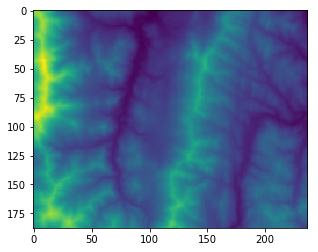

In [19]:
raster = imageio.imread(os.path.join(data_dir, 'DEM.tif'))
plt.imshow(raster)
plt.show()

**Read images as numpy arrays.**

In [20]:
original = imageio.imread(os.path.join(data_dir, 'DEM.tif'))
smoothed = imageio.imread(os.path.join(data_dir, 'smoothed.tif'))
breached = imageio.imread(os.path.join(data_dir, 'breached.tif'))
flow_accum = imageio.imread(os.path.join(data_dir, 'flow_accum.tif'))

**Display multiple images in one plot.**

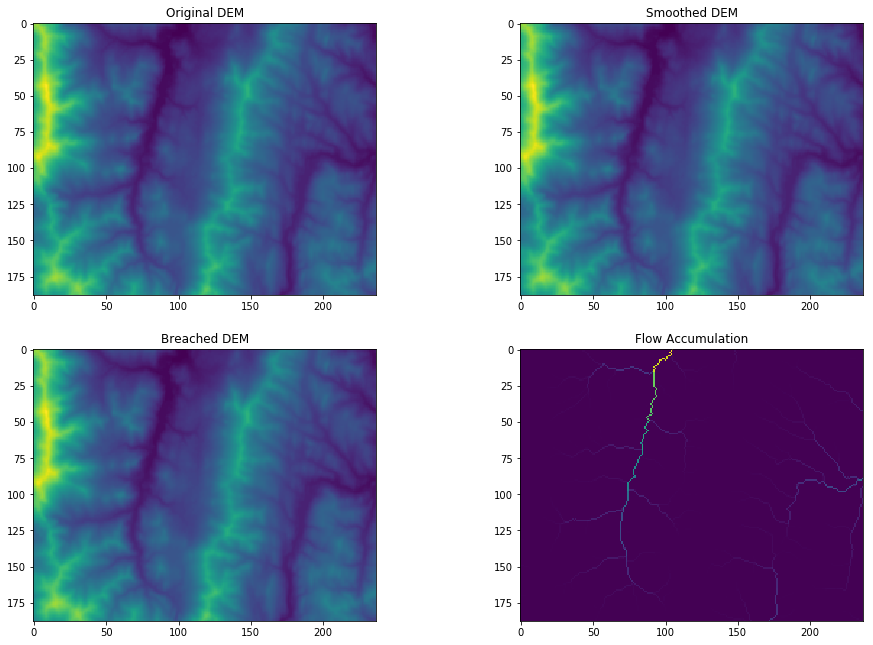

In [21]:
fig=plt.figure(figsize=(16,11))

ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title('Original DEM')
plt.imshow(original)

ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title('Smoothed DEM')
plt.imshow(smoothed)

ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title('Breached DEM')
plt.imshow(breached)

ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title('Flow Accumulation')
plt.imshow(flow_accum)

plt.show()

## whitebox GUI

WhiteboxTools also provides a Graphical User Interface (GUI) - **WhiteboxTools Runner**, which can be invoked using the following Python script. *__Note that the GUI might not work in Jupyter notebooks deployed on the cloud (e.g., MyBinder.org), but it should work on Jupyter notebooks on local computers.__*

```python
import whitebox
whitebox.Runner()

```

![](https://wetlands.io/file/images/whitebox.png)

## Citing whitebox

If you use the **whitebox** Python package for your research and publications, please consider citing the following papers to give Prof. [John Lindsay](http://www.uoguelph.ca/~hydrogeo/index.html) credits for his tremendous efforts in developing [Whitebox GAT](https://github.com/jblindsay/whitebox-geospatial-analysis-tools) and [WhiteboxTools](https://github.com/jblindsay/whitebox-tools). Without his work, this **whitebox** Python package would not exist!  

* Lindsay, J. B. (2016). Whitebox GAT: A case study in geomorphometric analysis. Computers & Geosciences, 95, 75-84. http://dx.doi.org/10.1016/j.cageo.2016.07.003

## Credits

This interactive notebook is made possible by [MyBinder.org](https://mybinder.org/). Big thanks to [MyBinder.org](https://mybinder.org/) for developing the amazing binder platform, which is extremely valuable for reproducible research!

This tutorial made use a number of open-source Python packages, including [ Cookiecutter](https://github.com/audreyr/cookiecutter), [numpy](http://www.numpy.org/), [matplotlib](https://matplotlib.org/), [imageio](https://imageio.readthedocs.io/en/stable/installation.html), [tifffile](https://pypi.org/project/tifffile/), and [google-drive-downloader](https://github.com/ndrplz/google-drive-downloader). Thanks to all developers of these wonderful Python packages!


## Contact

If you have any questions regarding this tutorial or the **whitebox** Python package, you can contact me (Dr. Qiusheng Wu) at wqs@binghamton.edu or https://wetlands.io/#contact